In [2]:
%matplotlib notebook
# Use matplotlib notebook for its added features of coordinate display and zoom
from plantcv import plantcv as pcv
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Target Image

<IPython.core.display.Javascript object>


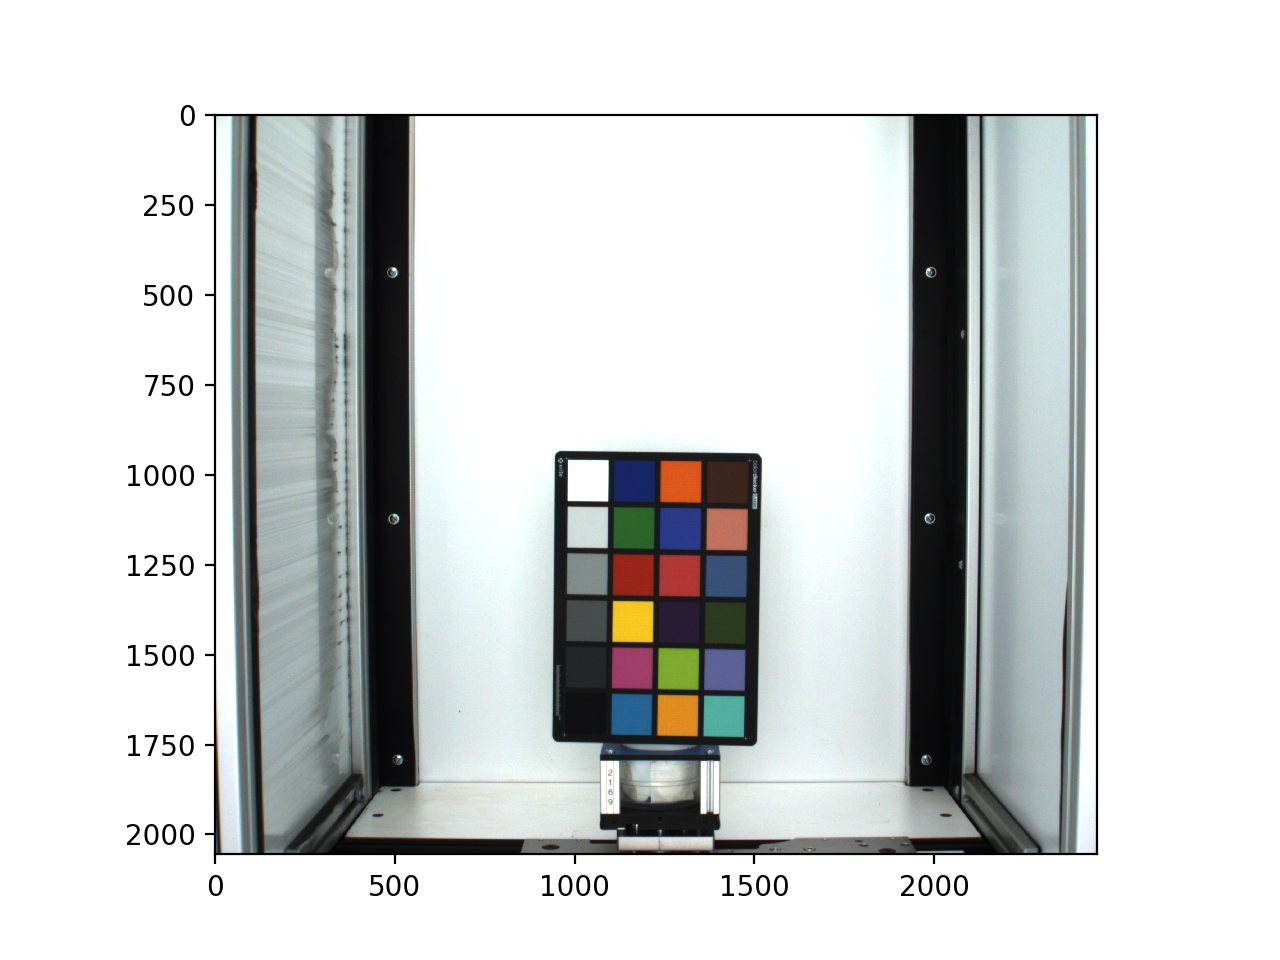

In [3]:
#read in img
img, img_path, img_filename = pcv.readimage(filename="target_TM018_F_100416_VIS_SV_0_z1_h1_g0_e65_v500_422435_0.png", debug="plot")

In [7]:
dimensions = [50, 50]
start = (1000, 1000)
x_dist = 130
y_dist = 130
rows = 6
cols = 4

In [8]:
chips = []
for i in range(0, rows):
    y = start[1] + i * y_dist
    for j in range(0, cols):
        x = start[0] + j * x_dist
        chips.append(pcv.roi.rectangle(img=img, x=x, y=y, w=dimensions[0], h=dimensions[1]))

<IPython.core.display.Javascript object>


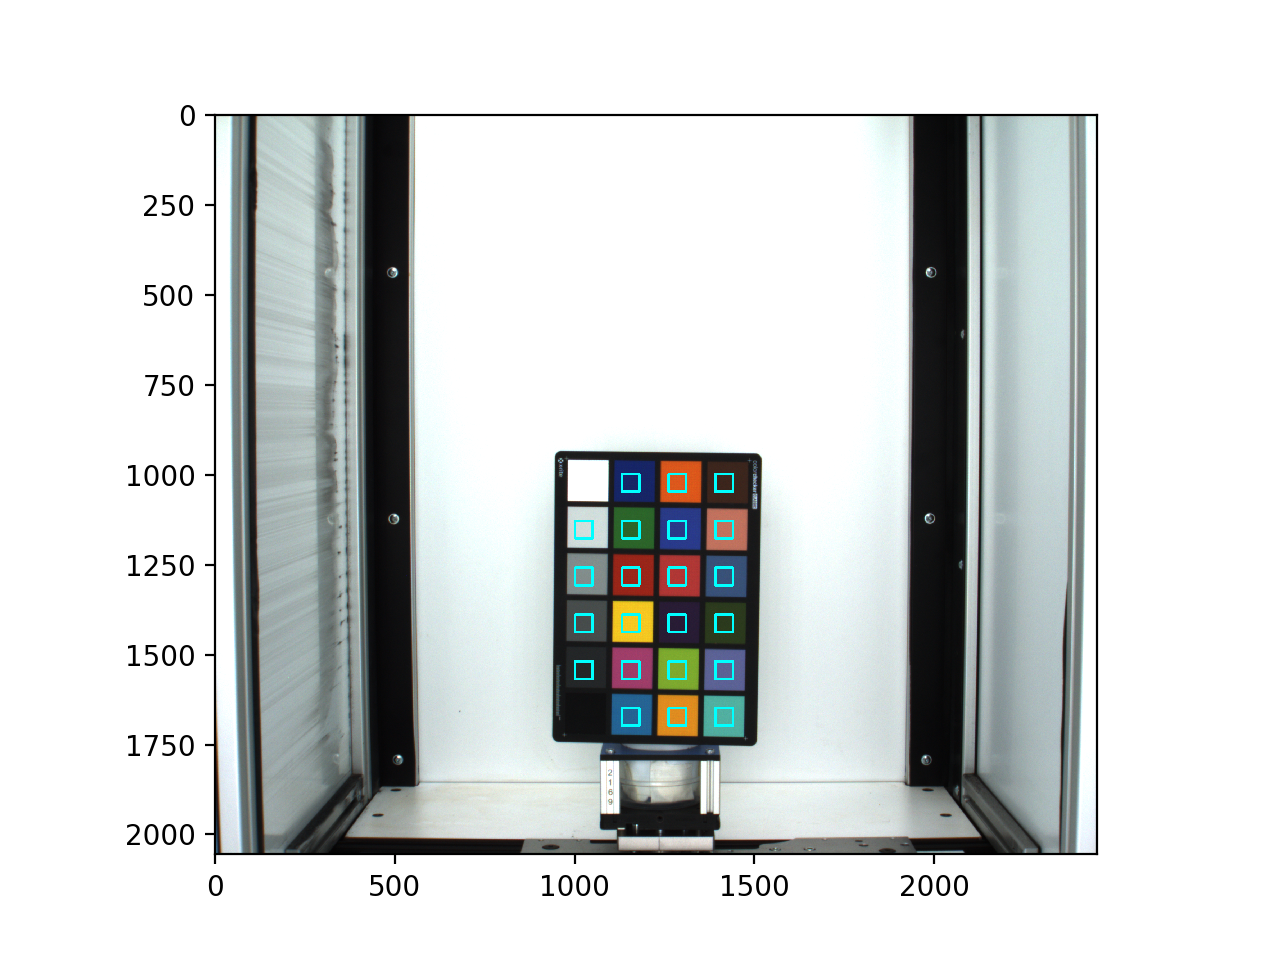

In [9]:
canvas = np.copy(img)
del chips[20] # Remove black
del chips[0] # Remove white
for chip in chips:
    cv2.drawContours(canvas, chip[0], -1, (255, 255, 0), 5)
pcv.plot_image(canvas)

<IPython.core.display.Javascript object>


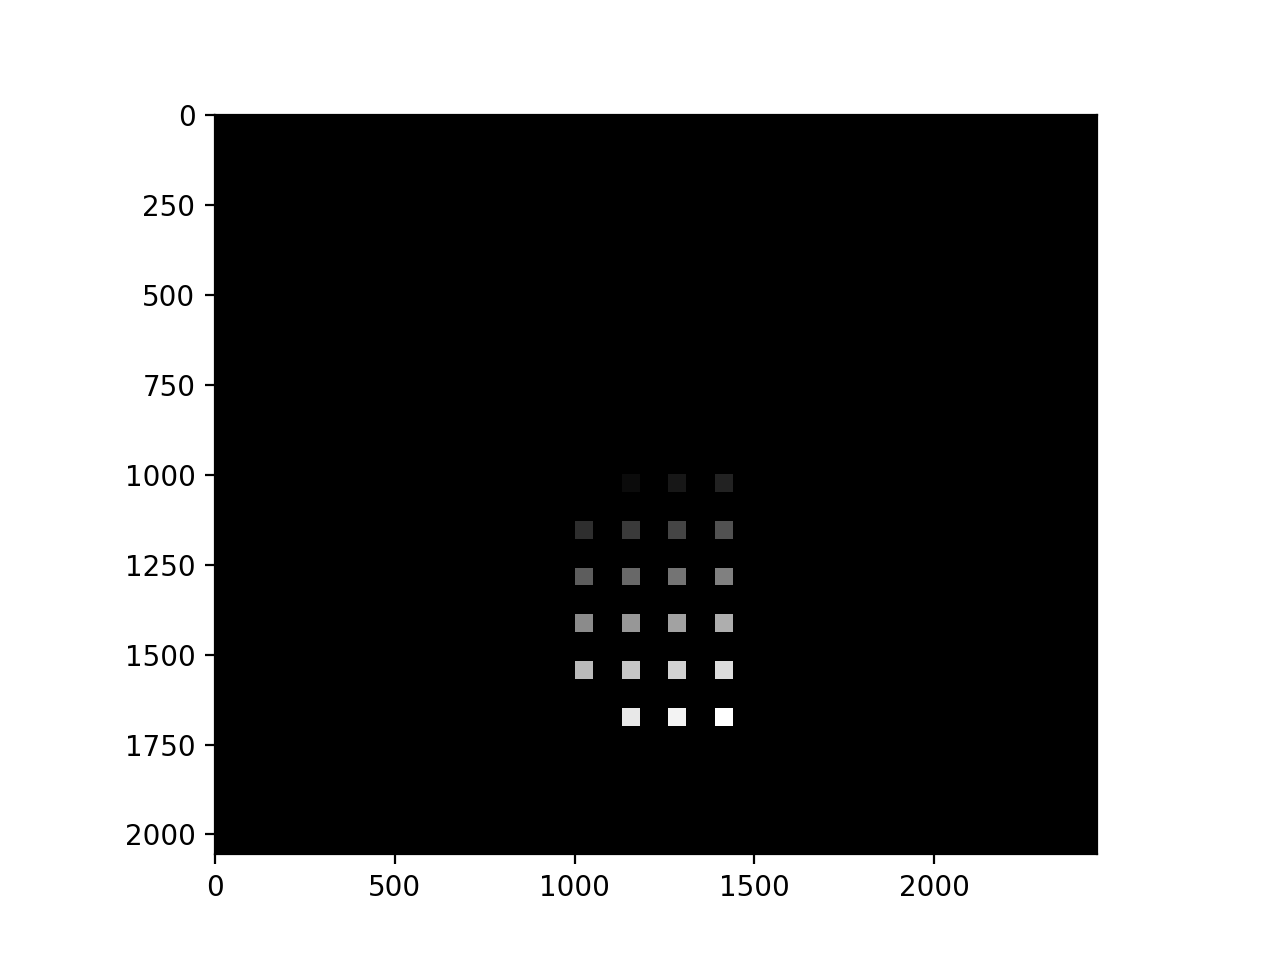

In [10]:
# Create empty mask img
mask = np.zeros(shape=np.shape(img)[:2], dtype = np.uint8())
i = 1
for chip in chips:
    mask = cv2.drawContours(mask, chip[0], -1, (i*10), -1)
    i += 1
pcv.plot_image(mask, cmap="gray")

In [11]:
np.unique(mask)

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220], dtype=uint8)

In [12]:
# Write to file
pcv.print_image(img=mask, filename="color_card_mask_target.png")